In [1]:
import pandas as pd
import pygmt
import verde as vd
import numpy as np
import pyproj
import matplotlib.pyplot as plt
import eqs_magnetics as eqs
from itertools import product

In [2]:
df = pd.read_csv('../data/victoria_land.csv')
df

/tmp/ipykernel_623933/1680060348.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/victoria_land.csv')


,Line,Date,Time,Lat,Lon,Easting,Northing,Upward,Height_WGS84,Project,MagGol
2040251,LG1L10.1,1991/01/01,NaN,-74.68848,162.09804,414493.389433,-8.290939e+06,2700.0,2700.0,GITARA,-62.476330
2040252,LG1L10.1,1991/01/01,NaN,-74.68859,162.09933,414531.970602,-8.290949e+06,2700.0,2700.0,GITARA,-62.500752
2040253,LG1L10.1,1991/01/01,NaN,-74.68869,162.10062,414570.496834,-8.290959e+06,2700.0,2700.0,GITARA,-62.529617
2040254,LG1L10.1,1991/01/01,NaN,-74.68879,162.10188,414608.139331,-8.290968e+06,2700.0,2700.0,GITARA,-62.566840
2040255,LG1L10.1,1991/01/01,NaN,-74.68889,162.10316,414646.370247,-8.290977e+06,2700.0,2700.0,GITARA,-62.610168
...,...,...,...,...,...,...,...,...,...,...,...
4294661,LNVT91,1993/02/01,NaN,-76.12685,161.77679,413770.034807,-8.451695e+06,2700.0,2700.0,GITARA,25.993211
4294662,LNVT91,1993/02/01,NaN,-76.12732,161.77625,413758.465517,-8.451748e+06,2700.0,2700.0,GITARA,25.811278
4294663,LNVT91,1993/02/01,NaN,-76.12778,161.77568,413746.034477,-8.451800e+06,2700.0,2700.0,GITARA,25.631227
4294664,LNVT91,1993/02/01,NaN,-76.12824,161.77513,413734.138943,-8.451852e+06,2700.0,2700.0,GITARA,25.452877


In [3]:
easting = df.Easting.to_numpy()
northing = df.Northing.to_numpy()
upwards = df.Upward.to_numpy()
coordinates = [easting, northing, upwards]

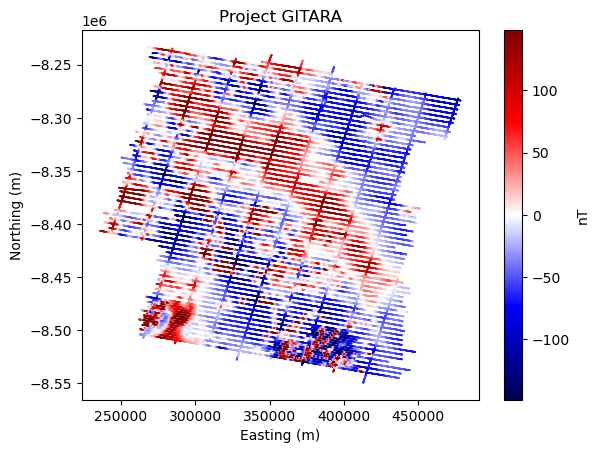

In [4]:
plt.figure()
scale = np.nanpercentile(df.MagGol, 95)
plt.scatter(*coordinates[:2], c=df.MagGol, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
plt.title("Project GITARA")
plt.show()

In [5]:
field_direction = eqs.angles_to_vector(84, 122, 1)

In [6]:
# Largest source
#source1a
source1a = vd.profile_coordinates((260e3,-8.25e6),(310e3,-8.27e6), size=2000, extra_coords=-5e3)[0]
dipole_moment = [eqs.angles_to_vector(85, 75, 5e8) for i in range(source1a[0].size)]
#source1b
source1b = vd.profile_coordinates((260e3,-8.255e6),(310e3,-8.275e6), size=2000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source1a, source1b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source1b[0].size)])
#source1c
source1c = vd.profile_coordinates((270e3,-8.26e6),(310e3,-8.28e6), size=2000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source1c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source1c[0].size)])
#source1d
source1d = vd.profile_coordinates((280e3,-8.27e6),(310e3,-8.285e6), size=2000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source1d)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source1d[0].size)])
#source1e
source1e = vd.profile_coordinates((280e3,-8.29e6),(325e3,-8.29e6), size=2000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source1e)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source1e[0].size)])
#source2a
source2a = vd.profile_coordinates((285e3,-8.29e6),(380e3,-8.320e6), size=2000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source2a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source2a[0].size)])
#source2b
source2b = vd.profile_coordinates((285e3,-8.295e6),(380e3,-8.325e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source2b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source2b[0].size)])
#source3a
source3a = vd.profile_coordinates((310e3,-8.31e6),(380e3,-8.33e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source3a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source3a[0].size)])
#source3b
source3b = vd.profile_coordinates((300e3,-8.315e6),(380e3,-8.34e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source3b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source3b[0].size)])
#source3c
source3c = vd.profile_coordinates((290e3,-8.32e6),(395e3,-8.345e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source3c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source3c[0].size)])
#source3d
source3d = vd.profile_coordinates((290e3,-8.325e6),(400e3,-8.35e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source3d)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source3d[0].size)])
#source3e
source3e = vd.profile_coordinates((290e3,-8.33e6),(395e3,-8.355e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source3e)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source3e[0].size)])
#source4a
source4a = vd.profile_coordinates((345e3,-8.35e6),(395e3,-8.365e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source4a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source4a[0].size)])
#source4b
source4b = vd.profile_coordinates((340e3,-8.36e6),(400e3,-8.375e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source4b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source4b[0].size)])
#source4c
source4c = vd.profile_coordinates((345e3,-8.365e6),(400e3,-8.38e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source4c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e8) for i in range(source4c[0].size)])
#source5a
source5a = vd.profile_coordinates((360e3,-8.37e6),(400e3,-8.385e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source5a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source5a[0].size)])
#source5b
source5b = vd.profile_coordinates((365e3,-8.38e6),(400e3,-8.39e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source5b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source5b[0].size)])
#source5c
source5c = vd.profile_coordinates((370e3,-8.385e6),(405e3,-8.395e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source5c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source5c[0].size)])
#source5d
source5d = vd.profile_coordinates((375e3,-8.39e6),(405e3,-8.40e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source5d)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source5d[0].size)])
#source5e
source5e = vd.profile_coordinates((375e3,-8.395e6),(410e3,-8.405e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source5e)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source5e[0].size)])
#source6a
source6a = vd.profile_coordinates((370e3,-8.40e6),(410e3,-8.41e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source6a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source6a[0].size)])
#source6b
source6b = vd.profile_coordinates((370e3,-8.405e6),(415e3,-8.415e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source6b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source6b[0].size)])
#source6c
source6c = vd.profile_coordinates((370e3,-8.41e6),(415e3,-8.42e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source6c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source6c[0].size)])
#source6d
source6d = vd.profile_coordinates((370e3,-8.415e6),(420e3,-8.425e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source6d)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source6d[0].size)])
#source7a
source7a = vd.profile_coordinates((390e3,-8.42e6),(420e3,-8.43e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source7a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source7a[0].size)])
#source7b
source7b = vd.profile_coordinates((395e3,-8.425e6),(425e3,-8.435e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source7b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source7b[0].size)])
#source7b
source7b = vd.profile_coordinates((395e3,-8.43e6),(425e3,-8.44e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source7b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source7b[0].size)])
#source7c
source7c = vd.profile_coordinates((395e3,-8.435e6),(430e3,-8.445e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source7c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 2e8) for i in range(source7c[0].size)])
#source8a
source8a = vd.profile_coordinates((400e3,-8.44e6),(440e3,-8.45e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8a)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 1e8) for i in range(source8a[0].size)])
#source8b
source8b = vd.profile_coordinates((405e3,-8.445e6),(435e3,-8.455e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8b[0].size)])
#source8c
source8c = vd.profile_coordinates((415e3,-8.45e6),(430e3,-8.46e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8c)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8c[0].size)])
#source8d
source8d = vd.profile_coordinates((418e3,-8.455e6),(425e3,-8.465e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8d)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8d[0].size)])
#source8e
source8e = vd.profile_coordinates((419e3,-8.46e6),(422e3,-8.47e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8e)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8e[0].size)])
#source8e
source8e = vd.profile_coordinates((420e3,-8.46e6),(422e3,-8.47e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8e)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8e[0].size)])
#source8f
source8f = vd.profile_coordinates((420e3,-8.465e6),(420e3,-8.475e6), size=4000, extra_coords=-5e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source8f)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 9e7) for i in range(source8f[0].size)])


# North Anomalies
#source9a
source9a = vd.grid_coordinates([340e3,390e3,-8.26e6,-8.20e6,], spacing=1000, extra_coords=-200)
source9a = [np.asarray(c).ravel() for c in source9a]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source9a)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 5e8) for i in range(source9a[0].size)])
#source 9b
source9b = vd.scatter_points([250e3, 430e3, -8.28e6, -8.20e6,], size=1000, random_state=0, extra_coords=-1e3)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source9b)]
dipole_moment.extend([eqs.angles_to_vector(45, 80, 1e10) for i in range(source9b[0].size)])
#source9c
source9c = vd.grid_coordinates([420e3,430e3,-8.315e6,-8.30e6,], spacing=1000, extra_coords=-200)
source9c = [np.asarray(c).ravel() for c in source9c]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source9c)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 9e8) for i in range(source9c[0].size)])


# West scatter anomalies
#source10
source10 = vd.scatter_points([250e3, 290e3, -8.34e6, -8.30e6,], size=200, random_state=10,extra_coords=-100)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source10)]
dipole_moment.extend([eqs.angles_to_vector(60, 75, 5e9) for i in range(source10[0].size)])


# Grid source 1
#source11a
source11a = vd.grid_coordinates([248e3,270e3,-8.38e6,-8.36e6,], spacing=1000, extra_coords=-200)
source11a = [np.asarray(c).ravel() for c in source11a]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source11a)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 5e9) for i in range(source11a[0].size)])
# Grid source 2
#source11b
source11b = vd.grid_coordinates([290e3,310e3,-8.38e6,-8.36e6,], spacing=1000, extra_coords=-200)
source11b = [np.asarray(c).ravel() for c in source11b]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source11b)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 5e9) for i in range(source11b[0].size)])
# Grid source 3
#source11c
source11c = vd.grid_coordinates([330e3,350e3,-8.40e6,-8.38e6,], spacing=1000, extra_coords=-200)
source11c = [np.asarray(c).ravel() for c in source11c]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source11c)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 5e9) for i in range(source11c[0].size)])


# Middle Scatter Anomalies
#source12a
source12a = vd.scatter_points([240e3, 260e3, -8.42e6, -8.38e6,], size=250, random_state=1,extra_coords=-100)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source12a)]
dipole_moment.extend([eqs.angles_to_vector(60, 45, 3e9) for i in range(source12a[0].size)])
#source12b
source12b = vd.scatter_points([310e3, 400e3, -8.46e6, -8.41e6,], size=1000, random_state=2,extra_coords=-100)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source12b)]
dipole_moment.extend([eqs.angles_to_vector(60, 45, 5e9) for i in range(source12b[0].size)])


# South-west Anomalies
#source13a
source13a = vd.grid_coordinates([270e3,300e3,-8.47e6,-8.45e6,], spacing=1000, extra_coords=-200)
source13a = [np.asarray(c).ravel() for c in source13a]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source13a)]
dipole_moment.extend([eqs.angles_to_vector(88, 80, 2e9) for i in range(source13a[0].size)])
#source13b
source13b = vd.profile_coordinates((260e3,-8.54e6),(300e3,-8.48e6), size=1000, extra_coords=-6e3)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source13b)]
dipole_moment.extend([eqs.angles_to_vector(85, 75, 5e9) for i in range(source13b[0].size)])
#source13c
source13c = vd.scatter_points([250e3, 275e3, -8.50e6, -8.485e6,], size=750, random_state=1, extra_coords=-1e3)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source13c)]
dipole_moment.extend([eqs.angles_to_vector(45, 80, 1e9) for i in range(source13c[0].size)])


# South-east Anomalies
#source14a
source14a = vd.profile_coordinates((370e3,-8.53e6),(400e3,-8.49e6), size=1000, extra_coords=-300)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source14a)]
dipole_moment.extend([eqs.angles_to_vector(45, 10, 8e8) for i in range(source14a[0].size)])
#source14b
source14b = vd.profile_coordinates((370e3,-8.53e6),(385e3,-8.49e6), size=1000, extra_coords=-300)[0]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source14b)]
dipole_moment.extend([eqs.angles_to_vector(45, 10, 8e8) for i in range(source14b[0].size)])
#source14c
source14c = vd.scatter_points([355e3, 410e3, -8.55e6, -8.50e6,], size=500, random_state=1, extra_coords=-1e3)
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, source14c)]
dipole_moment.extend([eqs.angles_to_vector(45, 80, 5e9) for i in range(source14c[0].size)])


# regional
regional = vd.grid_coordinates([200e3,500e3,-8.6e6,-8.2e6,], spacing=5000, extra_coords=-30e3)
regional = [np.asarray(c).ravel() for c in regional]
source_coordinates = [np.concatenate([s, o]) for s, o in zip(source_coordinates, regional)]
dipole_moment.extend([eqs.angles_to_vector(-88, 80, 1e11) for i in range(regional[0].size)])

In [7]:
magnetic_field = eqs.dipole_magnetic(coordinates, source_coordinates, dipole_moment)
total_field_anomaly = eqs.total_field_anomaly(magnetic_field, field_direction)
bnorm = eqs.magnetic_field_norm(magnetic_field)

/home/jupyter-india/.conda/envs/eqs-gb-norm-of-b/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


type: 

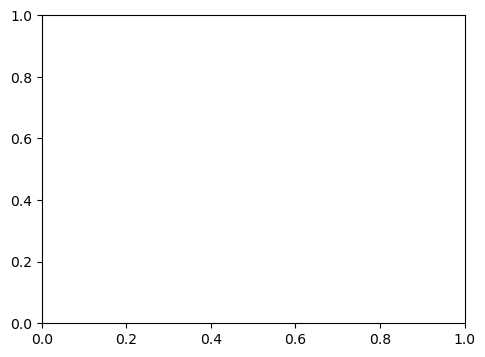

In [8]:
plt.figure(figsize=(12,4))
scale = np.nanpercentile(total_field_anomaly, 95)
plt.subplot(1,2,1)
plt.scatter(*coordinates[:2], c=total_field_anomaly, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("TFA of Synthetic Data")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
scale_bnorm = np.nanpercentile(bnorm, 95)
plt.subplot(1,2,2)
plt.scatter(*coordinates[:2], c=bnorm, cmap="seismic",s=0.01, vmin=-scale_bnorm, vmax=scale_bnorm)
plt.title("Norm of B of Synthetic Data")
plt.colorbar()
plt.show()

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
scale = np.nanpercentile(df.MagGol, 95)
plt.scatter(*coordinates[:2], c=df.MagGol, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
plt.title("Project GITARA")

plt.subplot(1,2,2)
scale = np.nanpercentile(total_field_anomaly, 95)
plt.scatter(*coordinates[:2], c=total_field_anomaly, cmap="seismic",s=0.01, vmin=-scale, vmax=scale)
plt.title("TFA of Synthetic Data")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.colorbar(label="nT")
scale_bnorm = np.nanpercentile(bnorm, 95)

plt.show()

## EQS Deep¶